<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/1_Advanced_Deep_Learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input , Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [0]:
input_tensor=Input(shape=(1,))

In [0]:
output_tensor=Dense(1)(input_tensor)

In [0]:
from keras.models import Model
model=Model(input_tensor,output_tensor)

In [0]:
 model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_absolute_error')

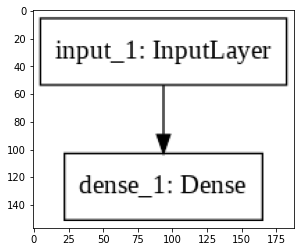

In [7]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(model,to_file='model.png')
data=plt.imread('model.png')
plt.imshow(data)
plt.show()

In [10]:
import pandas as pd
games_tourney=pd.read_csv('games_tourney.csv')
games_tourney.head(2)

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1


In [0]:
games_tourney.shape
4234-3430

In [12]:
print(games_tourney[:-804].shape)
games_tourney_train=games_tourney[:-804]

(3430, 9)


In [13]:
history=model.fit(x=games_tourney_train['seed_diff'],y=games_tourney_train['score_diff'],epochs=1,
          batch_size=128,validation_split=0.1,verbose=True)

Train on 3087 samples, validate on 343 samples
Epoch 1/1
3087/3087 [==============================] - 0s 78us/step - loss: 9.1908 - val_loss: 8.5082


In [14]:
print(games_tourney[:-804].shape,games_tourney[:804].shape)
games_tourney_test=games_tourney[:804]

(3430, 9) (804, 9)


In [15]:
x_test=games_tourney_test['seed_diff']
y_test=games_tourney_test['score_diff']
print(model.evaluate(x_test,y_test,verbose=False))

8.785781713267465


In [0]:
X=games_tourney['seed_diff']
y=games_tourney['score_diff']


In [0]:
# if i split the data using scikit learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.234402,random_state=42)

In [18]:
history=model.fit(X_train,y_train,epochs=5,
          batch_size=128,validation_split=0.1,verbose=True)

Train on 2916 samples, validate on 325 samples
Epoch 1/5
2916/2916 [==============================] - 0s 11us/step - loss: 9.1209 - val_loss: 8.8385
Epoch 2/5
2916/2916 [==============================] - 0s 11us/step - loss: 9.1210 - val_loss: 8.8397
Epoch 3/5
2916/2916 [==============================] - 0s 10us/step - loss: 9.1207 - val_loss: 8.8399
Epoch 4/5
2916/2916 [==============================] - 0s 9us/step - loss: 9.1207 - val_loss: 8.8389
Epoch 5/5
2916/2916 [==============================] - 0s 8us/step - loss: 9.1207 - val_loss: 8.8405


In [0]:
print(model.evaluate(X_test,y_test,verbose=False))

In [0]:
from keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
early=EarlyStopping(monitor='val_loss',patience=3)
check=ModelCheckpoint(monitor='val_loss',save_best_only=True,filepath='best.hdf5')

In [21]:
history=model.fit(X_train,y_train,epochs=1000,
          batch_size=128,validation_split=0.1,verbose=True,callbacks=[early,check])

Train on 2916 samples, validate on 325 samples
Epoch 1/1000
2916/2916 [==============================] - 0s 9us/step - loss: 9.1205 - val_loss: 8.8396
Epoch 2/1000
2916/2916 [==============================] - 0s 9us/step - loss: 9.1203 - val_loss: 8.8414
Epoch 3/1000
2916/2916 [==============================] - 0s 9us/step - loss: 9.1201 - val_loss: 8.8415
Epoch 4/1000
2916/2916 [==============================] - 0s 9us/step - loss: 9.1202 - val_loss: 8.8424


In [0]:
from keras.models import load_model

In [0]:
model_best = load_model('best.hdf5')

In [24]:
print(model_best.evaluate(X_test,y_test,verbose=False))

9.314800708075424


# CHP 2: Two Input Networks Using Categorical Embeddings, Shared Layers, and Merge Layers

games_season.csv

In [0]:
from keras.layers import Embedding ,Input,Flatten
from numpy import unique
import numpy as np

In [30]:
games_season=pd.read_csv('games_season.csv')
games_season.head(2)

,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1


In [0]:
n_teams=np.unique(games_season.team_1).shape[0]
# input layer from the Team ID
teamid_in=Input(shape=(1,))

In [0]:
# embedding layer
team_lookup=Embedding(input_dim=n_teams,output_dim=1,input_length=1,name='Team-strength')

In [0]:
strength_lookup=team_lookup(teamid_in)

In [0]:
strength_lookup_flatten=Flatten()(strength_lookup)

In [0]:
team_strength_model=Model(teamid_in,strength_lookup_flatten,name='Team_Stregth_Model')

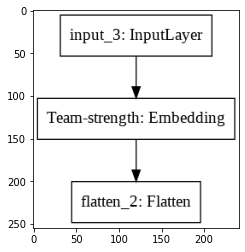

In [75]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(team_strength_model,to_file='model2.png')
data=plt.imread('model2.png')
plt.imshow(data)
plt.show()

## Shared layers

In [0]:

from keras.layers import Input

In [0]:
team_in_1=Input(shape=(1,),name='Team-1-In')
team_in_2=Input(shape=(1,),name='Team-2-In')

In [0]:
team_1_strength=team_strength_model(team_in_1)
team_2_strength=team_strength_model(team_in_2)

## After sharing layers in a same model we merge them n then use them in a new model

In [0]:
# Import the Subtract layer from keras
from keras.layers import Subtract
score_diff=Subtract()([team_1_strength,team_2_strength])

In [0]:
model=Model([team_in_1,team_in_2],score_diff)

In [0]:
model.compile(optimizer='adam',loss='mean_absolute_error',)

## Model of 2 inputs with the required shapes and ouputs made.Now feed it with real inputs

In [0]:
input_1=games_season['team_1']
input_2=games_season['team_2']

In [46]:
model.fit([input_1,input_2],games_season['score_diff'],epochs=1,batch_size=2048,validation_split=0.1,verbose=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 280960 samples, validate on 31218 samples
Epoch 1/1
280960/280960 [==============================] - 0s 2us/step - loss: 12.1202 - val_loss: 11.8379


# New Section 3 Multiple Inputs: 3 Inputs (and Beyond!)
**You know there is a well-documented home-team advantage in basketball, so you will add a new input to your model to capture this effect.**
The team_strength_model you used in the previous chapter has been loaded into your workspace. After applying it to each input, use a Concatenate layer to join the two team strengths and with the home vs away variable, and pass the result to a Dense layer.

In [0]:
# now we make 3 input model...we first use the embedding model of team-strength fro both inputs
# and then join them using conatenate...then use dense layer to make an output tensor
# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')



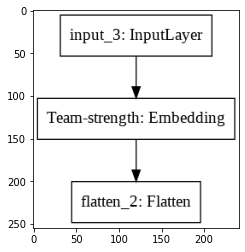

In [76]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(team_strength_model,to_file='model2.png')
data=plt.imread('model2.png')
plt.imshow(data)
plt.show()

In [0]:
# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

In [0]:
# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
from keras.layers import add ,Concatenate
out = Concatenate()([team_1_strength, team_2_strength, home_in] )
out = Dense(1)(out)

In [0]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

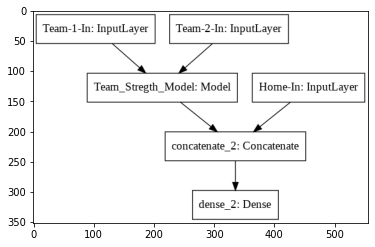

In [78]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(model,to_file='model3.png')
data=plt.imread('model3.png')
plt.imshow(data)
plt.show()

## Fit the model and evaluate

Now that you've defined a new model, fit it to the regular season basketball data.

Use the model you fit in the previous exercise (which was trained on the regular season data) and evaluate the model on data for tournament games (games_tourney)

In [0]:
# Import the model class
from keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [115]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=.10,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
               games_tourney['score_diff'], verbose=False))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 280960 samples, validate on 31218 samples
Epoch 1/1
280960/280960 [==============================] - 0s 2us/step - loss: 12.0009 - val_loss: 12.3667
11.674962411357031


## Stacking
Use Predictions from one model as an input to a second model.
When stacking,its important to use different datasets for EACH MODEL.
Here we will use **REGULAR SEASON as 1 model** and **TOURNAMENT DATA as the 2nd Model**.
We will not do embedding as the predictions from the REGULAR SEASON MODEL captures the effects of team_1 and team_2 which means you dont need to use those 2 variables in the tournament model and can avoid the use of an **embedding layer**
So now you can focus only on purely numeric data

In [111]:
games_tourney.columns

Index(['season', 'team_1', 'team_2', 'home', 'seed_diff', 'score_diff',
       'score_1', 'score_2', 'won', 'pred'],
      dtype='object')

In [0]:
# we will use the predictions of the regular season model here
# but we will do predictions on the TOURNAMENT season .
# so the model is of REGULAR season but the predictions are on Tournament SEASON
# so we make a new columns of predictions
games_tourney['pred']=model.predict([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']])

In [0]:
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']])

In [0]:
input_tensor=Input(shape=(3,))
output_tensor=Dense(1)(input_tensor)
model3=Model(input_tensor,output_tensor)

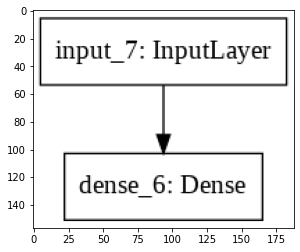

In [129]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(model3,to_file='model4.png')
data=plt.imread('model4.png')
plt.imshow(data)
plt.show()

In [0]:
# Compile the model
model3.compile(optimizer='adam', loss='mean_absolute_error')

In [95]:
#make a train model of game_tourney with 3168,10 shape
print(games_tourney[:3168].shape,games_tourney[3168:].shape,games_tourney[:-3168].shape)
#use only a[:3168] and a[3168:]

(3168, 10) (1066, 10) (1066, 10)


In [98]:
a=[1,2,3,4,5,6,7,8,9,10]
print(a[:3],a[3:],a[:-3],a[-3:])

[1, 2, 3] [4, 5, 6, 7, 8, 9, 10] [1, 2, 3, 4, 5, 6, 7] [8, 9, 10]


In [0]:
games_tourney_train=games_tourney[:3168]
games_tourney_test=games_tourney[3168:]

In [122]:
# Fit the model
model3.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

Epoch 1/1
3168/3168 [==============================] - 0s 41us/step - loss: 15.7166


In [124]:
games_tourney_test.head(2)

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
3168,2010,2365,401,0,15,29,73,44,1,0.409862
3169,2010,10655,401,0,0,-17,44,61,0,0.317513


In [126]:
print(model3.evaluate(games_tourney_test[['home','seed_diff','pred']],games_tourney_test['score_diff'], verbose=False))

14.488983052309191


# 4 Multiple Outputs



In [0]:
input_tensor=Input(shape=(2,))
output_tensor=Dense(2)(input_tensor)

In [0]:
model4=Model(input_tensor,output_tensor)

In [0]:
# Compile the model
model4.compile(optimizer='adam',loss='mean_absolute_error')

In [0]:
# Fit the model
model4.fit(games_tourney_train[['seed_diff', 'pred']], games_tourney_train[['score_1', 'score_2']], verbose=True,epochs=100,batch_size=16384)

In [144]:
# Print the model's weights
print(model4.get_weights())
# Print the column means of the training data
print(games_tourney_train.mean())

[array([[ 1.1119182 , -0.93008226],
       [-0.05392309, -0.7494077 ]], dtype=float32), array([0.1000834, 0.1000834], dtype=float32)]
season        1997.045455
team_1        5546.025568
team_2        5546.025568
home             0.000000
seed_diff        0.000000
score_diff       0.000000
score_1         71.912247
score_2         71.912247
won              0.500000
pred             0.338952
dtype: float64


# Use the same inputs and outputs as the training set when you evaluate the model

In [137]:
# Evaluate the model on the tournament test data
print(model4.evaluate(games_tourney_test[['seed_diff', 'pred']], games_tourney_test[['score_1', 'score_2']], verbose=False))

68.84816688981334


# Single model for classification and regression
Now u will be a list of 2 outputs i.e Regression and Classification when we fit the model
Its similar of making a 2 input model

# Our 2 Targets are to check SCORE_DIFF (regression) and whether they will win i.e WIN (classification) ...when we have a single input of SEED_DIFF (Which is  a manual scoring)

In [0]:
# Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model5 = Model(input_tensor, [output_tensor_1, output_tensor_2])

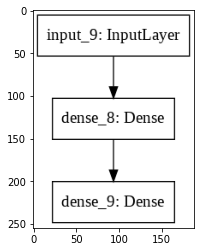

In [141]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(model5,to_file='model5.png')
data=plt.imread('model5.png')
plt.imshow(data)
plt.show()

In [0]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model5.compile(loss=['mean_absolute_error' ,'binary_crossentropy'], optimizer=Adam(lr=0.01))

In [142]:
# Print the model weights
print(model5.get_weights())

# Print the training data means
print(games_tourney_train.mean())

[array([[ 0.6032213 ],
       [-0.03428793]], dtype=float32), array([[1.6820661]], dtype=float32)]
season        1997.045455
team_1        5546.025568
team_2        5546.025568
home             0.000000
seed_diff        0.000000
score_diff       0.000000
score_1         71.912247
score_2         71.912247
won              0.500000
pred             0.338952
dtype: float64


In [143]:
# Evaluate the model on new data
# we have X=seed_dff ,pred  and Y= score_diff and WON
print(model5.evaluate(games_tourney_test[['seed_diff', 'pred']],
               [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))

[11.012116634376053, 9.547370910644531, 1.5173921585083008]
